## Basics of Linear Algebra

Importing necessary libraries for Linear Algebra. NumPy for LA and matplotlib for some plotting functions

In [75]:
import numpy as np
import matplotlib.pyplot as plt

### Transpose of Matrix

Matrix transpose is performed with the transpose method on a nested list or a Python array, or a higher-dimensional Numpy array.

In [76]:
# Transpose of a Matrix (as nested list)
a = [[1,0,2,9],[3,8,4,7]]
b = np.transpose(a)
print('a:\n',a,'\n')
print('b:\n',b,'\n')

a:
 [[1, 0, 2, 9], [3, 8, 4, 7]] 

b:
 [[1 3]
 [0 8]
 [2 4]
 [9 7]] 



If the matrix is a NumPy array, it can be treated as an object and method T can be applied over it as follows.

In [77]:
  # Transpose of a Matrix (as NumPy array)
print ("Matrix and its Transpose")
a = np.array([[1,0,2,9],[3,8,4,7]])
b = a.T
print('a:\n',a,'\n')
print('b:\n',b,'\n')

Matrix and its Transpose
a:
 [[1 0 2 9]
 [3 8 4 7]] 

b:
 [[1 3]
 [0 8]
 [2 4]
 [9 7]] 



The dot method of NumPy performs dot-matrix product (scalar product) for 1D or higher dimensional arrays. If the inputs are scalars (numbers), it performs multiplication.

In [78]:
# scalars
a = 7
b = 4
z = np.dot(a,b)
print(z)

28


In [79]:
z = a * b
print(z)

28


In the case of one- or higher-dimensional arrays, the inputs can be either NumPy arrays, Python arrays, Python lists or Python’s nested lists.

In [80]:
# 1D arrays or vectors
a = np.array([1,4,7])
b = np.array([2,-2,0])
z = np.dot(a,b)
print(z)

-6


In [81]:
# 2D arrays or matrices
a = [[1,3,5],[-1,0,-1],[0,-3,1]]
b = [[2,-1,9],[2,-6,-4], [1,3,4]]
z = np.dot(a,b)
print(z)

[[ 13  -4  17]
 [ -3  -2 -13]
 [ -5  21  16]]


We can obtained the same result using `np.matmul()`.

In [82]:
z = np.matmul(a,b)
print(z)

[[ 13  -4  17]
 [ -3  -2 -13]
 [ -5  21  16]]


### Numpy Arrays
A NumPy array is a Numpy object upon which the dot method can be performed as below. However, this method accepts only NumPy arrays to operate on.


In [83]:
# converting lists into NumPy arrays
M1 = np.array(a)
M2 = np.array(b)
z = M1.dot(M2)
print(z)

[[ 13  -4  17]
 [ -3  -2 -13]
 [ -5  21  16]]


### The multi_dot method

It performs dot (scalar) product with 2 or more input matrices. First and last arrays can be either 1D or 2D arrays. However, the dimensions of the matrices must suit subsequent scalar matrix multiplication.

In [84]:
# matrices with random integers: entries ranging from -4 to 4
a = np.random.randint(-4,4,(500,5))
b = np.random.randint(-4,4,(5,1000))
c = np.random.randint(-4,4,(1000,10))
d = np.random.randint(-4,4,(10,2000))
e = np.random.randint(-4,4,(2000,200))
# Perform multiple matrix multiplication
z = np.linalg.multi_dot([a,b,c,d,e])

The result of this method can be obtained with successive dot products of matrices but multi_dot functions in an optimized manner. It decides the order of dot multiplication to complete the entire process efficiently.

In [85]:
%%time
z = np.linalg.multi_dot([a,b,c,d,e])
print(z, '\n')

[[-11287800 -11292713 -11845745 ... -10402918 -12206414 -13003994]
 [ -6284082  -5874301  -7283343 ...  -8091510  -6292122  -8900652]
 [ -8832144  -8566058  -9101378 ...  -8243989  -9264385  -9632743]
 ...
 [  8177520   8892686   9894752 ...   8731459   9922743  11104071]
 [ -8617185  -7424549  -7747854 ...  -7936879  -7678094  -8388667]
 [ -9940589  -8548431  -9271034 ... -10105368  -8826601 -10602194]] 

CPU times: total: 0 ns
Wall time: 2.97 ms


In [86]:
%%time
z = a.dot(b).dot(c).dot(d).dot(e)
print(z, '\n')

[[-11287800 -11292713 -11845745 ... -10402918 -12206414 -13003994]
 [ -6284082  -5874301  -7283343 ...  -8091510  -6292122  -8900652]
 [ -8832144  -8566058  -9101378 ...  -8243989  -9264385  -9632743]
 ...
 [  8177520   8892686   9894752 ...   8731459   9922743  11104071]
 [ -8617185  -7424549  -7747854 ...  -7936879  -7678094  -8388667]
 [ -9940589  -8548431  -9271034 ... -10105368  -8826601 -10602194]] 

CPU times: total: 109 ms
Wall time: 144 ms


#### Observe the CPU time that multi_dot consumes as against CPU time that successive dot methods consume to arrive at the same solution. Which one is more efficient, why ?

Why is multi_dot more efficient?

Optimal Order of Operations (Matrix Chain Multiplication):

multi_dot automatically finds the most efficient order to perform the matrix multiplications using dynamic programming (like the Matrix Chain Multiplication problem from algorithms).

Chaining with .dot() performs operations left-to-right, which may lead to very expensive intermediate results.

Memory Management:

multi_dot reduces the size of temporary matrices created during intermediate steps, which helps in both speed and memory efficiency.

Chained .dot() creates large intermediate matrices that can slow down computation and consume more memory.



### Inner Product

The inner product is the scalar multiplication of one vector (or matrix) and the transpose of another vector (or matrix). If both arrays are 1D arrays, their dimensions should be identical. If either or both arrays are higher-dimensional, then the last dimensions of both arrays should be identical.

In [87]:
a = np.array([[5,0,3], [1,-1,3]])
b = np.array([6,-4,2])
z = np.inner(a,b)
print(z)

[36 16]


In [88]:

# The same results can be obtained using the dot method as follows.

a.dot(b.T)

array([36, 16])

### Outer Product

Outer product is the dot product of a column vector of size Mx1 and a row vector of size 1xN. The resulting array is a matrix of size MxN.


In [89]:
a = np.array([1,3,4,6,7,8,9,100,5])
b = np.array([6,3,2])
z = np.outer(a,b)
print(z)

[[  6   3   2]
 [ 18   9   6]
 [ 24  12   8]
 [ 36  18  12]
 [ 42  21  14]
 [ 48  24  16]
 [ 54  27  18]
 [600 300 200]
 [ 30  15  10]]


The last dimension of the second array and the second-to-last dimension of the first array should be identical to perform matrix multiplication. Further, the symbol @ is also used to perform matrix multiplication.

In [90]:
# Here, 'a' matrix is 3D, which means there are 3 matrices each of 2x5 size
# Similarly, for 'b' matrix
# So we perform 3 matrix multiplication operations each with 2x5 and 5x3 matrices from a and b
a = np.random.random([3,2,5])
b = np.random.random([3,5,3])
z = a @ b
print(z.shape)

(3, 2, 3)


### Matrix Determinant

Matrix determinant can be calculated using the method det available in the linalg module.

In [91]:
# generate a random integer matrix of size 3 by 3
a = np.random.randint(1,10,[3,3])
det = np.linalg.det(a)
print(det)

-72.0


### Matrix Inverse

Inverse of a square matrix can be derived using the inv method of the linalg module.


In [92]:
a = np.random.randint(-1,10,[4,4])
inv = np.linalg.inv(a)
print(a)
print()
print(inv)

[[ 1  3  3  3]
 [ 3  3 -1  6]
 [-1  2 -1  0]
 [ 3  4  0 -1]]

[[-0.08710801  0.07317073 -0.33449477  0.17770035]
 [ 0.07665505 -0.02439024  0.2543554   0.08362369]
 [ 0.24041812 -0.12195122 -0.15679443 -0.01045296]
 [ 0.04529617  0.12195122  0.01393728 -0.13240418]]


### Matrix Power

Matrix Power is a general method to obtain either positive or negative powers of a given square matrix. The first negative power of a matrix is technically termed its inverse. Thus, the matrix_power method can be used to find the inverse or any power of a matrix.

In [93]:
a = np.random.random([3,3])
# positive powers of matrix
a_2 = np.linalg.matrix_power(a, 4)
a_7 = np.linalg.matrix_power(a, 7)
# inverse of matrix
a_inv_1 = np.linalg.matrix_power(a, -1)
a_inv_3 = np.linalg.matrix_power(a, -3)
print('matrix \n', a)
print('\n matrix to the power 2\n', a_2)
print('\n matrix to the power 7\n', a_7)
print('\n matrix inverse \n', a_inv_1)
print('\n matrix cubic inverse \n', a_inv_3)

matrix 
 [[0.00535576 0.2768131  0.20433945]
 [0.07016473 0.69689318 0.94542627]
 [0.63060549 0.99736856 0.23382041]]

 matrix to the power 2
 [[0.34759285 0.97816272 0.75200742]
 [1.22783114 3.33999459 2.50272664]
 [0.99331174 2.92713265 2.32371797]]

 matrix to the power 7
 [[ 1.32571006  3.72148016  2.85535167]
 [ 4.48459643 12.60589825  9.68151212]
 [ 4.01450631 11.25028422  8.62123042]]

 matrix inverse 
 [[-9.65163101  1.72094603  1.47626708]
 [ 7.17428061 -1.57899237  0.11475612]
 [-4.57201512  2.0939119  -0.19415013]]

 matrix cubic inverse 
 [[-1004.03954089   165.5603932    146.703309  ]
 [  843.40760583  -141.6227893   -120.00605305]
 [ -632.9559281    108.05656233    88.55865428]]


### Eigenvalues and Eigenvectors

Eigenvalues and Eigenvectors of a matrix can be determined as follows. If Eigen values cannot be determined, the method throws an error (Eg. Singular matrix).

In [94]:
a = np.arange(9).reshape(3,3)
eig_val, eig_vec = np.linalg.eig(a)
print('Eigenvalues are: \n', eig_val)
print('\nEigenvectors are: \n', eig_vec)

Eigenvalues are: 
 [ 1.33484692e+01 -1.34846923e+00 -2.48477279e-16]

Eigenvectors are: 
 [[ 0.16476382  0.79969966  0.40824829]
 [ 0.50577448  0.10420579 -0.81649658]
 [ 0.84678513 -0.59128809  0.40824829]]


In [95]:
# Eigenvalues alone can be determined using the method eigvals as shown below.

a = np.arange(9).reshape(3,3)
eigenvalues = np.linalg.eigvals(a)
print(eigenvalues)

[ 1.33484692e+01 -1.34846923e+00 -2.48477279e-16]


### Traces of a Matrix

Traces of a square matrix is the summation of its diagonal elements.

In [96]:
a = np.eye(5)
print(a)
z = np.trace(a)
print('\nTrace of matrix is: ',z)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

Trace of matrix is:  5.0


### Matrix Norm

Matrix or vector norm is calculated using the norm method of the linalg module.


In [97]:
a = np.arange(12).reshape(4,3)
z = np.linalg.norm(a)
print(a)
print('\n Frobenius Norm of above matrix:')
print(z)


[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

 Frobenius Norm of above matrix:
22.494443758403985


#### Norm of Matrix

Axis-wise norm determination is also possible by specifying the axis as an integer.


In [98]:
# Norm along axis 0
a = np.arange(12).reshape(4,3)
z = np.linalg.norm(a, axis=0)
print(z)

[11.22497216 12.88409873 14.62873884]


### Solving System of Equations

When we think of Linear Algebra, the system of linear equations comes to our mind first, as it is tedious, time-consuming and error-prone. NumPy solves systems of linear equations in a fraction of seconds!

In [99]:
# Coefficient Matrix
a = np.random.randint(1,20,[4,4])
# Dependent variable vector
b = np.array([4,9,12,7])
# solution
x = np.linalg.solve(a,b)
print('Coefficient Matrix')
print(a)
print('\nDependent Variable vector')
print(b)
print('\nSolution')
print(x)

Coefficient Matrix
[[17 15  5 13]
 [ 1 10 13  1]
 [14  5 15 16]
 [11  2  6  3]]

Dependent Variable vector
[ 4  9 12  7]

Solution
[ 0.28185639 -0.14605954  0.79831874 -0.19940455]


In [100]:
# Check for correctness
B = a.dot(x)
print(B)

# This ‘B’ array is identical to the input ‘b’ array. Hence, our solution is correct.

[ 4.  9. 12.  7.]


### Singular Value Decomposition

Singular Value Decomposition (SVD) is one of the great dimension-reduction algorithms in machine learning. It identifies the principal components and arranges them by rank. The top ranked components contribute greatly to the original array. Here, we explore SVD with an image to get better understanding.

uint8 0 255 (512, 512, 3)
 0 255 (512, 512, 3)


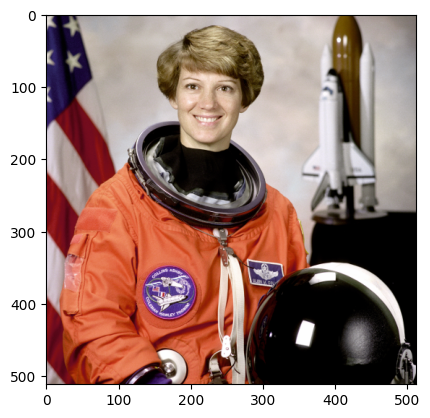

In [101]:
from skimage import data
# download a sample image
image = data.astronaut()
print(image.dtype, image.min(), image.max(), image.shape)
plt.imshow(image)
plt.show()

In [102]:
# Normalize the image by dividing it by the maximum value, 255 and reorder the axes to be (3,400,600).

# normalize image
img = image/255.0
# reorder the axes to have colour channels as the first dimension
img = np.transpose(img, axes=(2,0,1))

Perform SVD on the image. It decomposes the original image into three components: U matrix, Sigma vector, and V matrix. The Sigma vector is the diagonal entries of the Sigma matrix. Hence, it is advisable that the Sigma vector may be reformed into a diagonal matrix. It should be noted that the first dimension 3 refers to the three colour channels.

In [103]:
U,S,V = np.linalg.svd(img)
print(U.shape, S.shape, V.shape)


(3, 512, 512) (3, 512) (3, 512, 512)


In [104]:
# S matrix should have dimensions suitable for matrix multiplication
Sigma = np.zeros((3,512,512))
for i in range(3):
  np.fill_diagonal(Sigma[i,:,:], S[i,:])
print(Sigma.shape)

(3, 512, 512)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-6.1179360189012044e-15..1.0000000000000098].


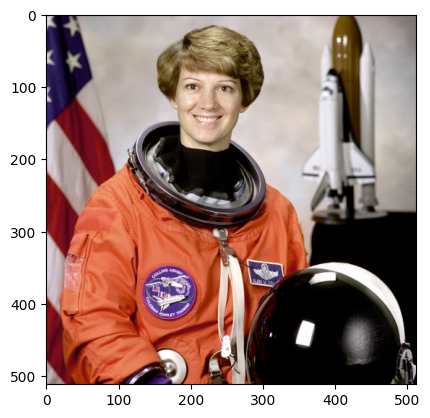

In [105]:
# Reconstruct the original image without any dimension reduction.
reconst = U @ Sigma @ V
reconst = np.transpose(reconst, axes=(1,2,0))
plt.imshow(reconst)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.23530800978715916..1.1711257752133282].


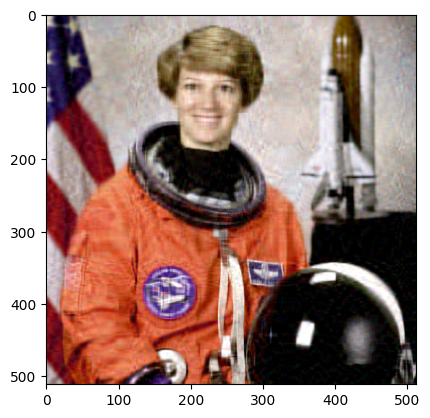

In [106]:
# NumPy SVD reconstruction

# Reconstruct the data by reducing the common dimensions from 512 to 50.

k = 40
reconst = U @ Sigma[:,:,:k] @ V[:,:k,:]
reconst = np.transpose(reconst, axes=(1,2,0))
plt.imshow(reconst)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.20565752139637877..1.1619626298752024].


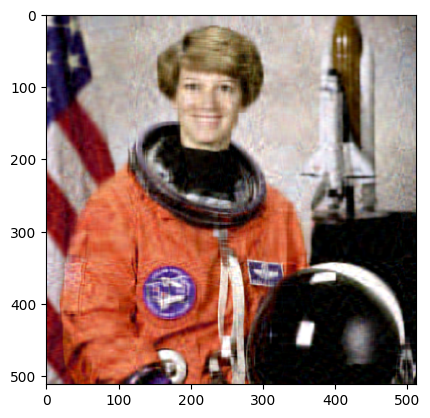

In [107]:
k = 35
reconst = U @ Sigma[:,:,:k] @ V[:,:k,:]
reconst = np.transpose(reconst, axes=(1,2,0))
plt.imshow(reconst)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.24050267087751637..1.2061354162677098].


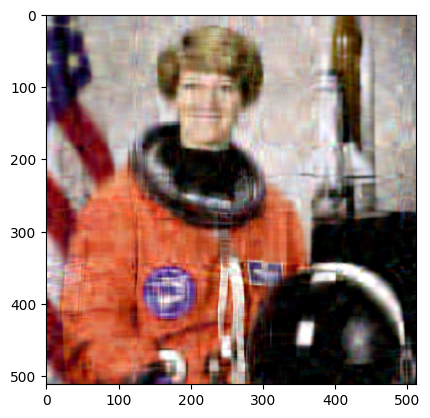

In [108]:
k = 20
reconst = U @ Sigma[:,:,:k] @ V[:,:k,:]
reconst = np.transpose(reconst, axes=(1,2,0))
plt.imshow(reconst)
plt.show()

#### Dimensionality reduction

It is amazing that we reconstructed the image with most details, even at a reduction of ¼.

We can once again reconstruct the same image by reducing the data points from 512 to 20.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2798592016477404..1.217837531584187].


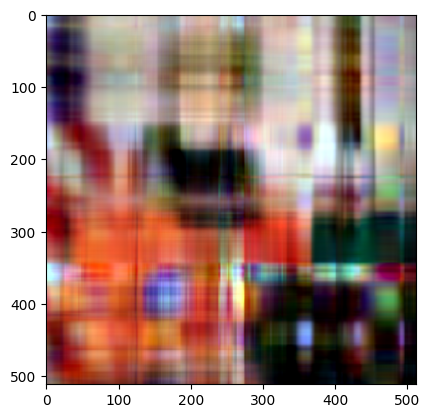

In [109]:
k = 5
reconst = U @ Sigma[:,:,:k] @ V[:,:k,:]
reconst = np.transpose(reconst, axes=(1,2,0))
plt.imshow(reconst)
plt.show()

#### SVD reconstruction

Out of 400 data points, merely 20 data points can reconstruct the image with key feature details! This is why the old mathematical algorithm- SVD is still popular in machine learning.

### Additional References

[Numpy Matrix Multiplication Terminology](https://likegeeks.com/numpy-matrix-multiplication/#Basic_Terminologies)

Matrix Multiplication without NumPy

In [110]:


def multiply_matrices(mat_a, mat_b):
    if len(mat_a[0]) != len(mat_b):
        raise ValueError("Number of columns in mat_a must equal number of rows in mat_b")

    result = []
    for i in range(len(mat_a)):
        row = []
        for j in range(len(mat_b[0])):
            sum = 0
            for k in range(len(mat_b)):
                sum += mat_a[i][k] * mat_b[k][j]
            row.append(sum)
        result.append(row)
    return result

mat_a = [[2, -1],
         [0, 3],
         [4, 1]]

mat_b = [[5, 6, 7],
         [8, 2, 10]]

result = multiply_matrices(mat_a, mat_b)

for row in result:
    print(row)



[2, 10, 4]
[24, 6, 30]
[28, 26, 38]
